In [58]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [49]:
from sklearn.model_selection import train_test_split
import cv2
import skimage
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [5]:
import os
import os.path
from pathlib import Path
import glob

In [28]:
Indian_Sign_Main_Path = Path("C:\\Users\\mehro\\Desktop\\Tensorflow_projects\\archive\\Indian")

In [29]:
Sign_JPG = list(Indian_Sign_Main_Path.glob(r"*/*.jpg"))

In [32]:
Sign_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Sign_JPG))

In [33]:
Sign_JPG_Series = pd.Series(Sign_JPG,name="JPG").astype(str)
Sign_Labels_Series = pd.Series(Sign_Labels,name="CATEGORY")

In [34]:
Main_Sign_Data = pd.concat([Sign_JPG_Series,Sign_Labels_Series],axis=1)

In [35]:
print(Main_Sign_Data.head(-1))

                                                     JPG CATEGORY
0      C:\Users\mehro\Desktop\Tensorflow_projects\arc...        1
1      C:\Users\mehro\Desktop\Tensorflow_projects\arc...        1
2      C:\Users\mehro\Desktop\Tensorflow_projects\arc...        1
3      C:\Users\mehro\Desktop\Tensorflow_projects\arc...        1
4      C:\Users\mehro\Desktop\Tensorflow_projects\arc...        1
...                                                  ...      ...
42739  C:\Users\mehro\Desktop\Tensorflow_projects\arc...        Z
42740  C:\Users\mehro\Desktop\Tensorflow_projects\arc...        Z
42741  C:\Users\mehro\Desktop\Tensorflow_projects\arc...        Z
42742  C:\Users\mehro\Desktop\Tensorflow_projects\arc...        Z
42743  C:\Users\mehro\Desktop\Tensorflow_projects\arc...        Z

[42744 rows x 2 columns]


In [36]:
def simple_vision(img_path):
    Picking_Img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    
    return Picking_Img

In [37]:
def threshold_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    return threshold_Img

In [38]:
def canny_vision(img_path):
    Threshold_Img = threshold_vision(img_path)
    Canny_Img = cv2.Canny(Threshold_Img,10,100)
    
    return Canny_Img

In [39]:
def skeleton_morph_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,Threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    Array_Img = np.array(Gray_Img > Threshold_Img).astype(int)
    Skeleton_Img = skimage.morphology.skeletonize(Array_Img)
    
    return Skeleton_Img

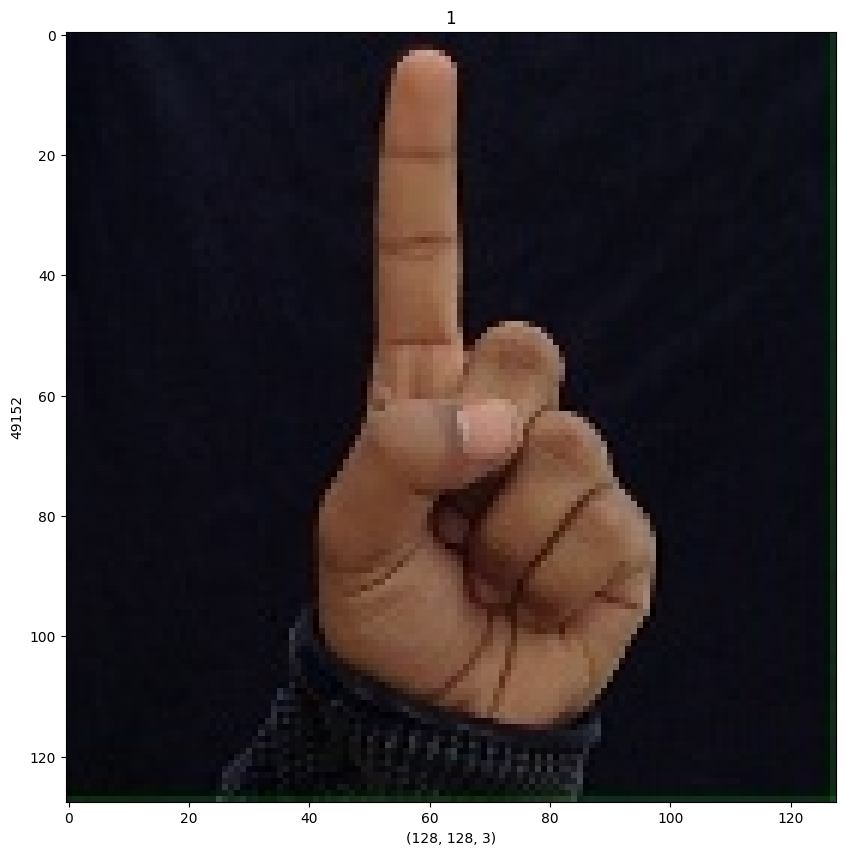

In [40]:
figure = plt.figure(figsize=(10,10))

Image_Sign = simple_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign)

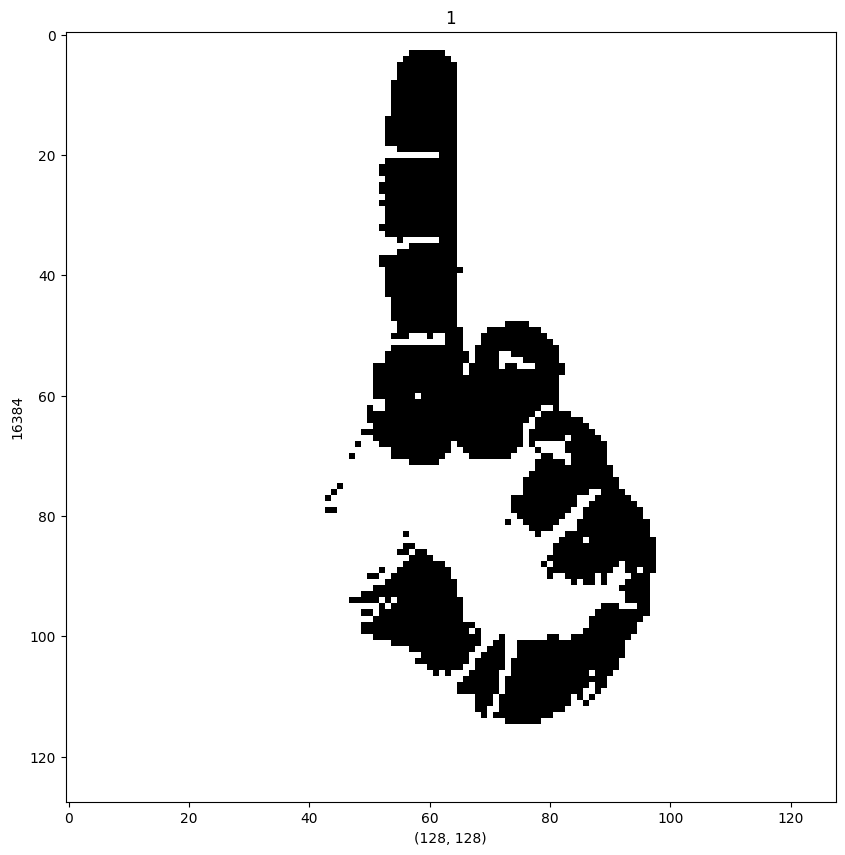

In [41]:
figure = plt.figure(figsize=(10,10))

Image_Sign = threshold_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign,cmap="gray")

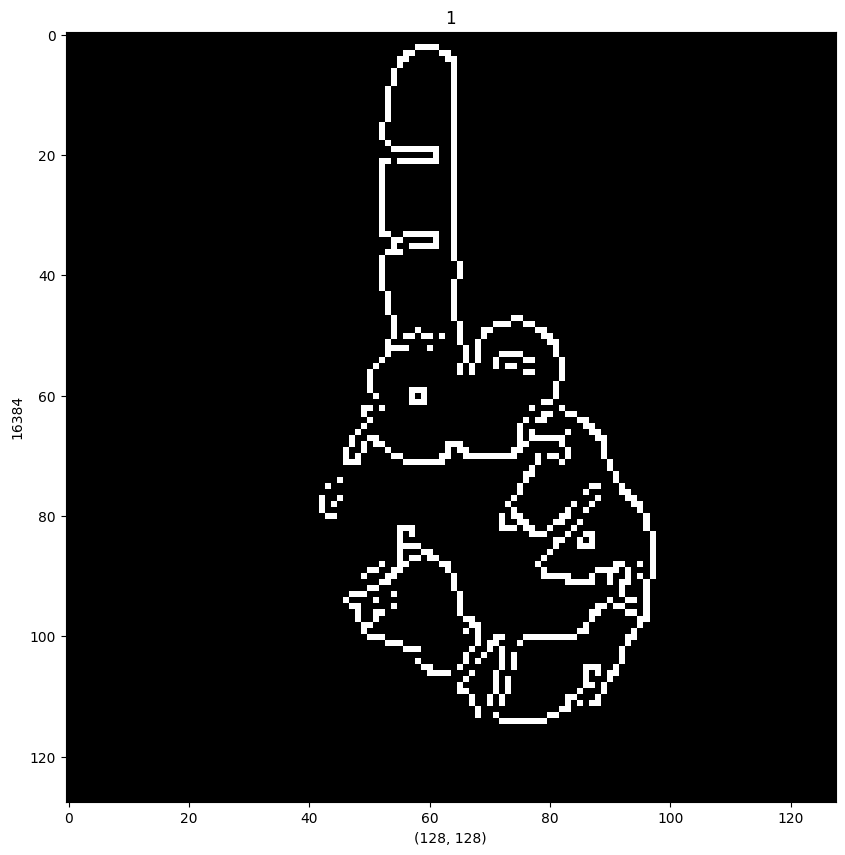

In [42]:
figure = plt.figure(figsize=(10,10))

Image_Sign = canny_vision(Main_Sign_Data["JPG"][33])

plt.xlabel(Image_Sign.shape)
plt.ylabel(Image_Sign.size)
plt.title(Main_Sign_Data["CATEGORY"][33])
plt.imshow(Image_Sign,cmap="gray")

C:\Users\mehro\AppData\Local\Temp\ipykernel_17672\2363011511.py:5: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")


Text(0.5, 1.0, '1')

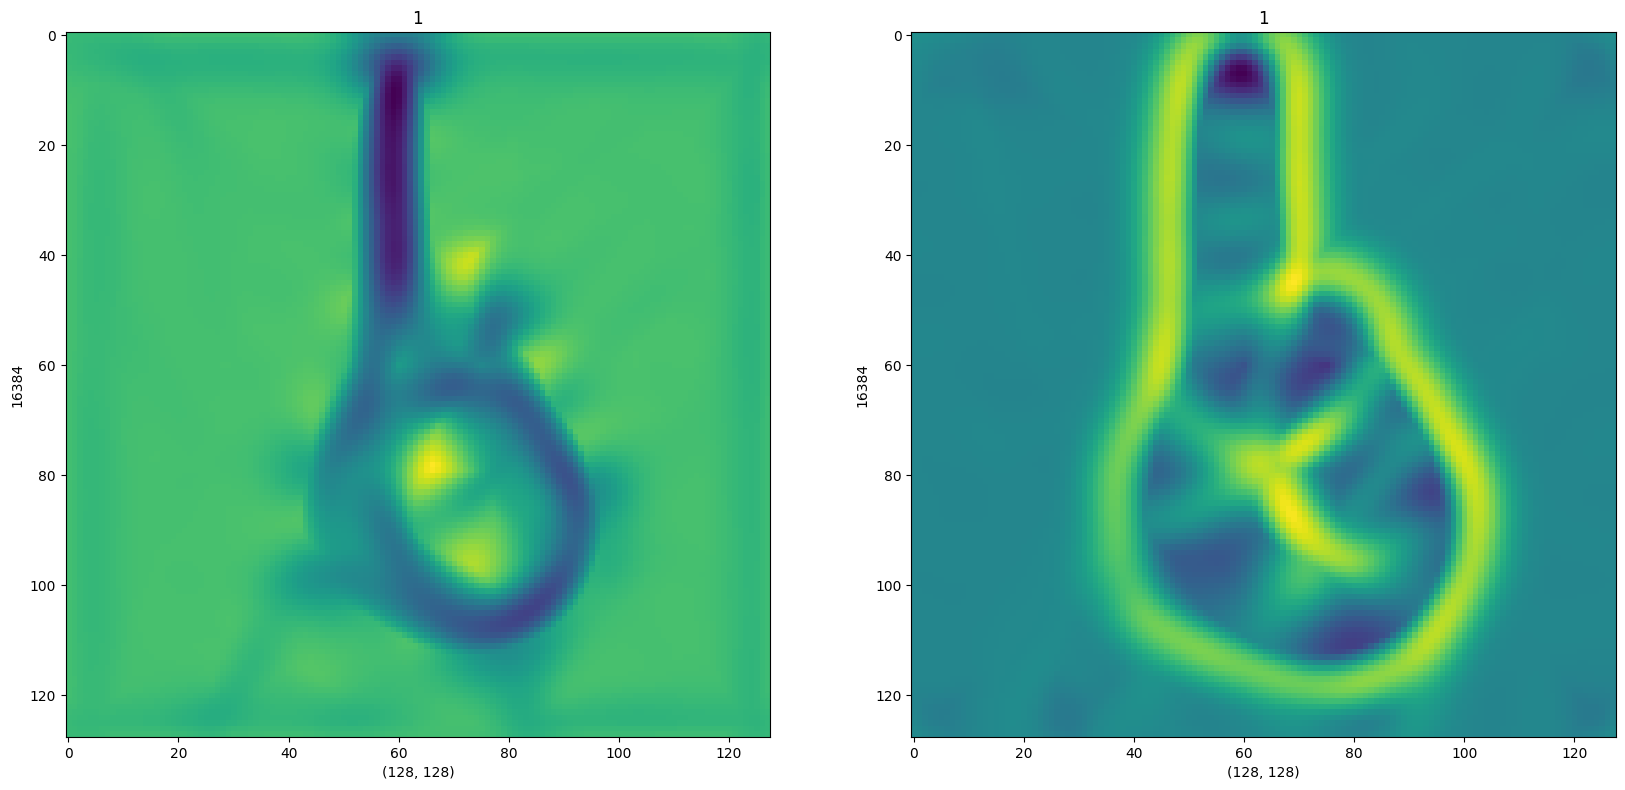

In [45]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Example_Image = cv2.cvtColor(cv2.imread(Main_Sign_Data["JPG"][33]),cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=5,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[0].set_xlabel(min_S.shape)
axis[0].set_ylabel(min_S.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][33])
axis[1].imshow(max_S)
axis[1].set_xlabel(max_S.shape)
axis[1].set_ylabel(max_S.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][33])

Text(0.5, 1.0, '1')

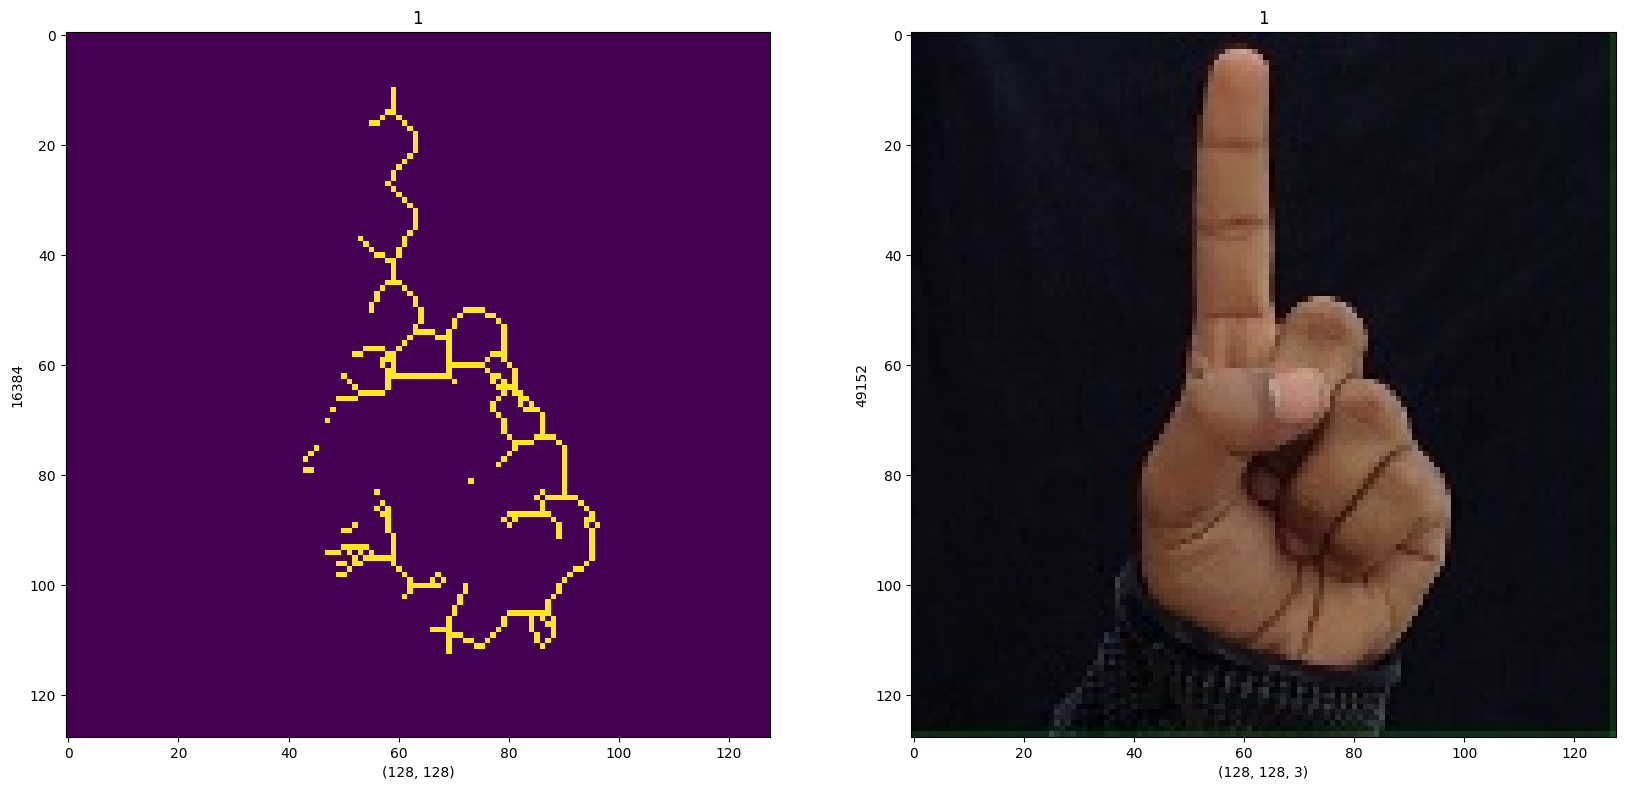

In [46]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(20,20))

Skel_Img = skeleton_morph_vision(Main_Sign_Data["JPG"][33])
Simple_Img = simple_vision(Main_Sign_Data["JPG"][33])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(Main_Sign_Data["CATEGORY"][33])
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(Main_Sign_Data["CATEGORY"][33])

In [50]:
X_Train,X_Test = train_test_split(Main_Sign_Data,train_size=0.9,random_state=123,shuffle=True)

In [51]:
print(X_Train.shape)
print(X_Test.shape)

(38470, 2)
(4275, 2)


In [52]:
print(type(X_Train))
print(type(X_Test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [55]:
Train_IMG_Generator = ImageDataGenerator(rescale=1./255,
                                        zoom_range=0.5,
                                        shear_range=0.5,
                                        brightness_range=[0.6,1.0],
                                        rotation_range=35,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        vertical_flip=True,
                                         featurewise_std_normalization=False,
                                         samplewise_center=False,
                                         samplewise_std_normalization=False,
                                        fill_mode="nearest",
                                        validation_split=0.1)

In [56]:
Test_IMG_Generator = ImageDataGenerator(rescale=1./255)

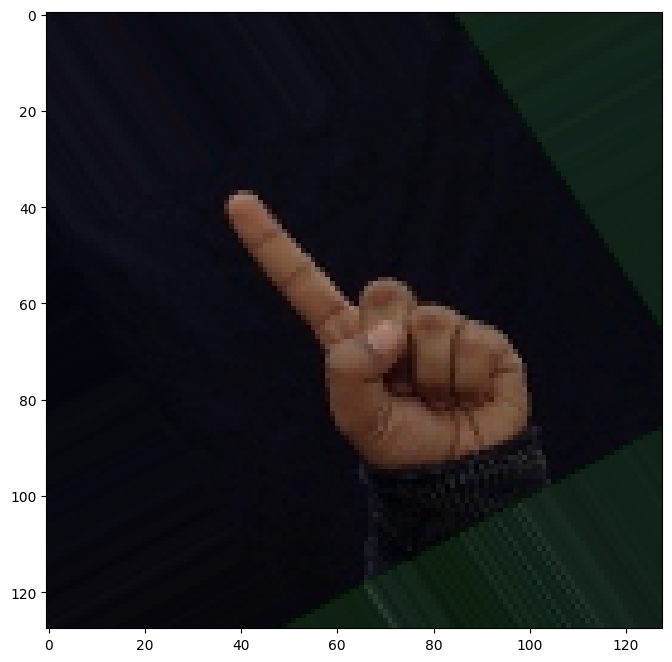

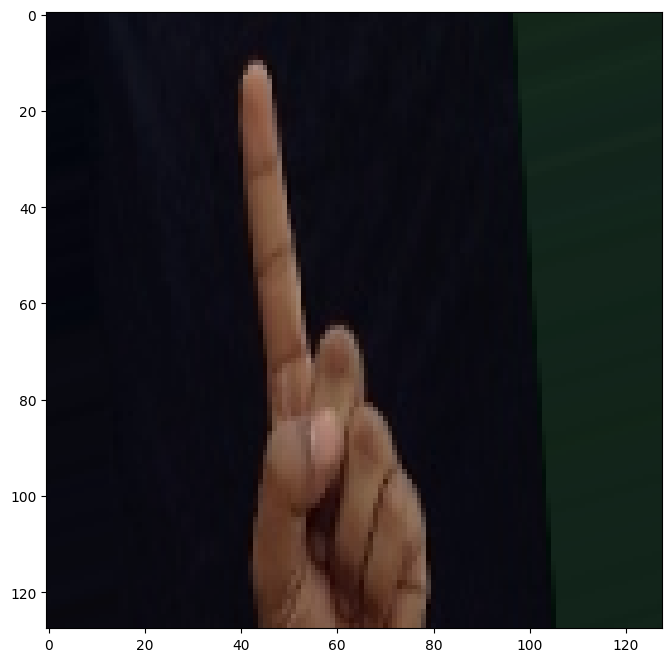

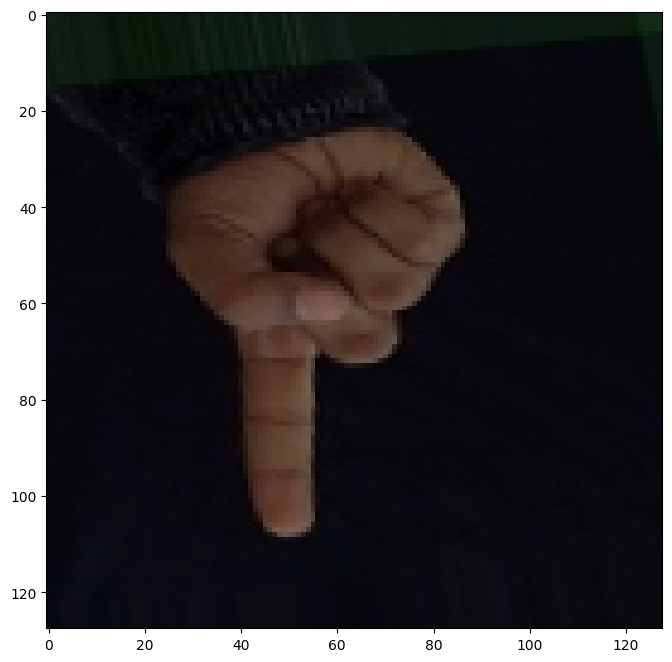

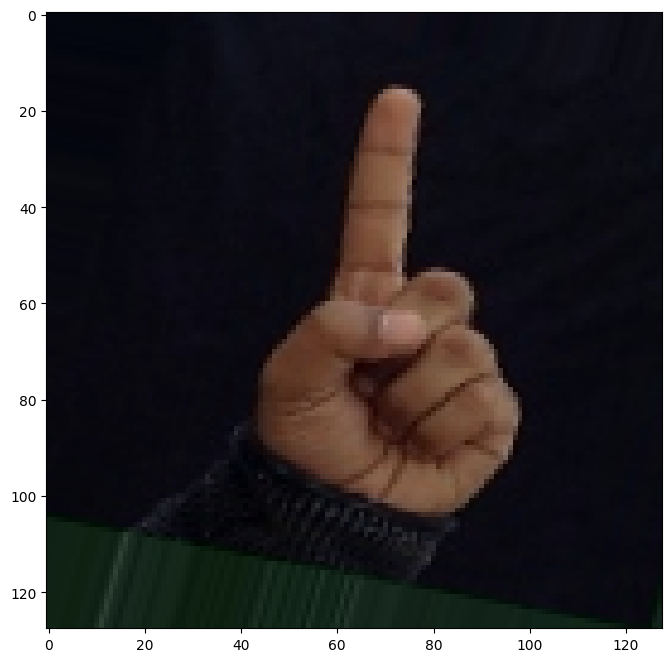

In [59]:
Example_Img = simple_vision(X_Train.JPG[3])
Example_Img = Example_Img.reshape((1,) + Example_Img.shape)

i = 0 

for batch in Train_IMG_Generator.flow(Example_Img,batch_size=32):
    
    figure = plt.figure(figsize=(8,8))
    plt.imshow(image.img_to_array(batch[0]))
    
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [60]:
Train_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=X_Train,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="training")

Found 34623 validated image filenames belonging to 35 classes.


In [61]:
Validation_Set = Train_IMG_Generator.flow_from_dataframe(dataframe=X_Train,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="validation")

Found 3847 validated image filenames belonging to 35 classes.


In [62]:
Test_Set = Test_IMG_Generator.flow_from_dataframe(dataframe=X_Test,
                                                   x_col="JPG",
                                                   y_col="CATEGORY",
                                                   batch_size=32,
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   shuffle=False)

Found 4275 validated image filenames belonging to 35 classes.


In [63]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
[15, 20, 34, 19, 0]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
[6, 0, 24, 8, 8]
(256, 256, 1)
------------------------------------------------------------
TEST: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L

In [64]:
COMPILE_OPTIMIZER = "adam"
COMPILE_LOSS = "categorical_crossentropy"
COMPILE_METRICS = ["accuracy"]
INPUT_DIM = (256,256,1)
OUTPUT_DIM = 35

In [65]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [66]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9791760664325252934
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2238133044
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8048437800888552237
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [74]:
Model = Sequential()

Model.add(Conv2D(24,(3,3),activation="relu",input_shape=INPUT_DIM))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Flatten())
Model.add(Dense(2352,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(OUTPUT_DIM,activation="softmax"))

In [75]:
Model.compile(optimizer=COMPILE_OPTIMIZER,loss=COMPILE_LOSS,metrics=COMPILE_METRICS)

In [77]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      epochs=5)

Epoch 1/5
1082/1082 [==============================] - 602s 556ms/step - loss: 0.5490 - accuracy: 0.8226 - val_loss: 0.4896 - val_accuracy: 0.9488
Epoch 2/5
1082/1082 [==============================] - 299s 276ms/step - loss: 0.1464 - accuracy: 0.9531 - val_loss: 0.4530 - val_accuracy: 0.9335
Epoch 3/5
1082/1082 [==============================] - 302s 279ms/step - loss: 0.1014 - accuracy: 0.9677 - val_loss: 0.2728 - val_accuracy: 0.9519
Epoch 4/5
1082/1082 [==============================] - 313s 289ms/step - loss: 0.0787 - accuracy: 0.9754 - val_loss: 0.1529 - val_accuracy: 0.9607
Epoch 5/5
1082/1082 [==============================] - 314s 290ms/step - loss: 0.0676 - accuracy: 0.9803 - val_loss: 0.2288 - val_accuracy: 0.9410


In [78]:
Model.save("Prediction_Model.h5")

<Axes: >

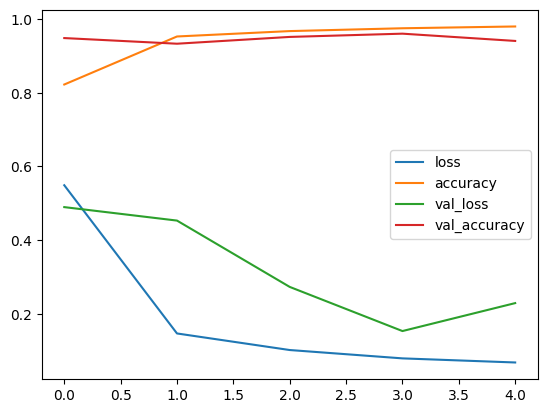

In [79]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


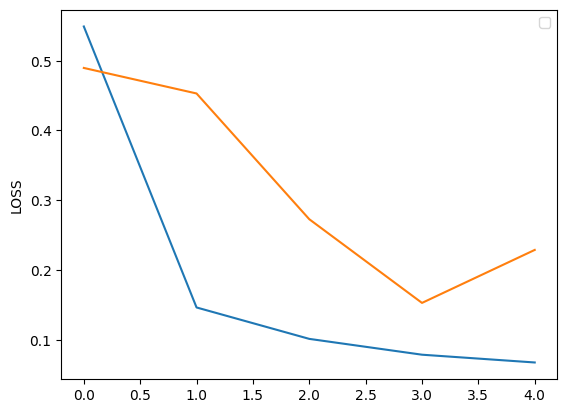

In [80]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [81]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

134/134 [==============================] - 47s 354ms/step - loss: 0.1161 - accuracy: 0.9726
LOSS:  0.1161
ACCURACY:  0.97


In [82]:
Model_Test_Prediction = Model.predict(Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)

134/134 [==============================] - 11s 81ms/step


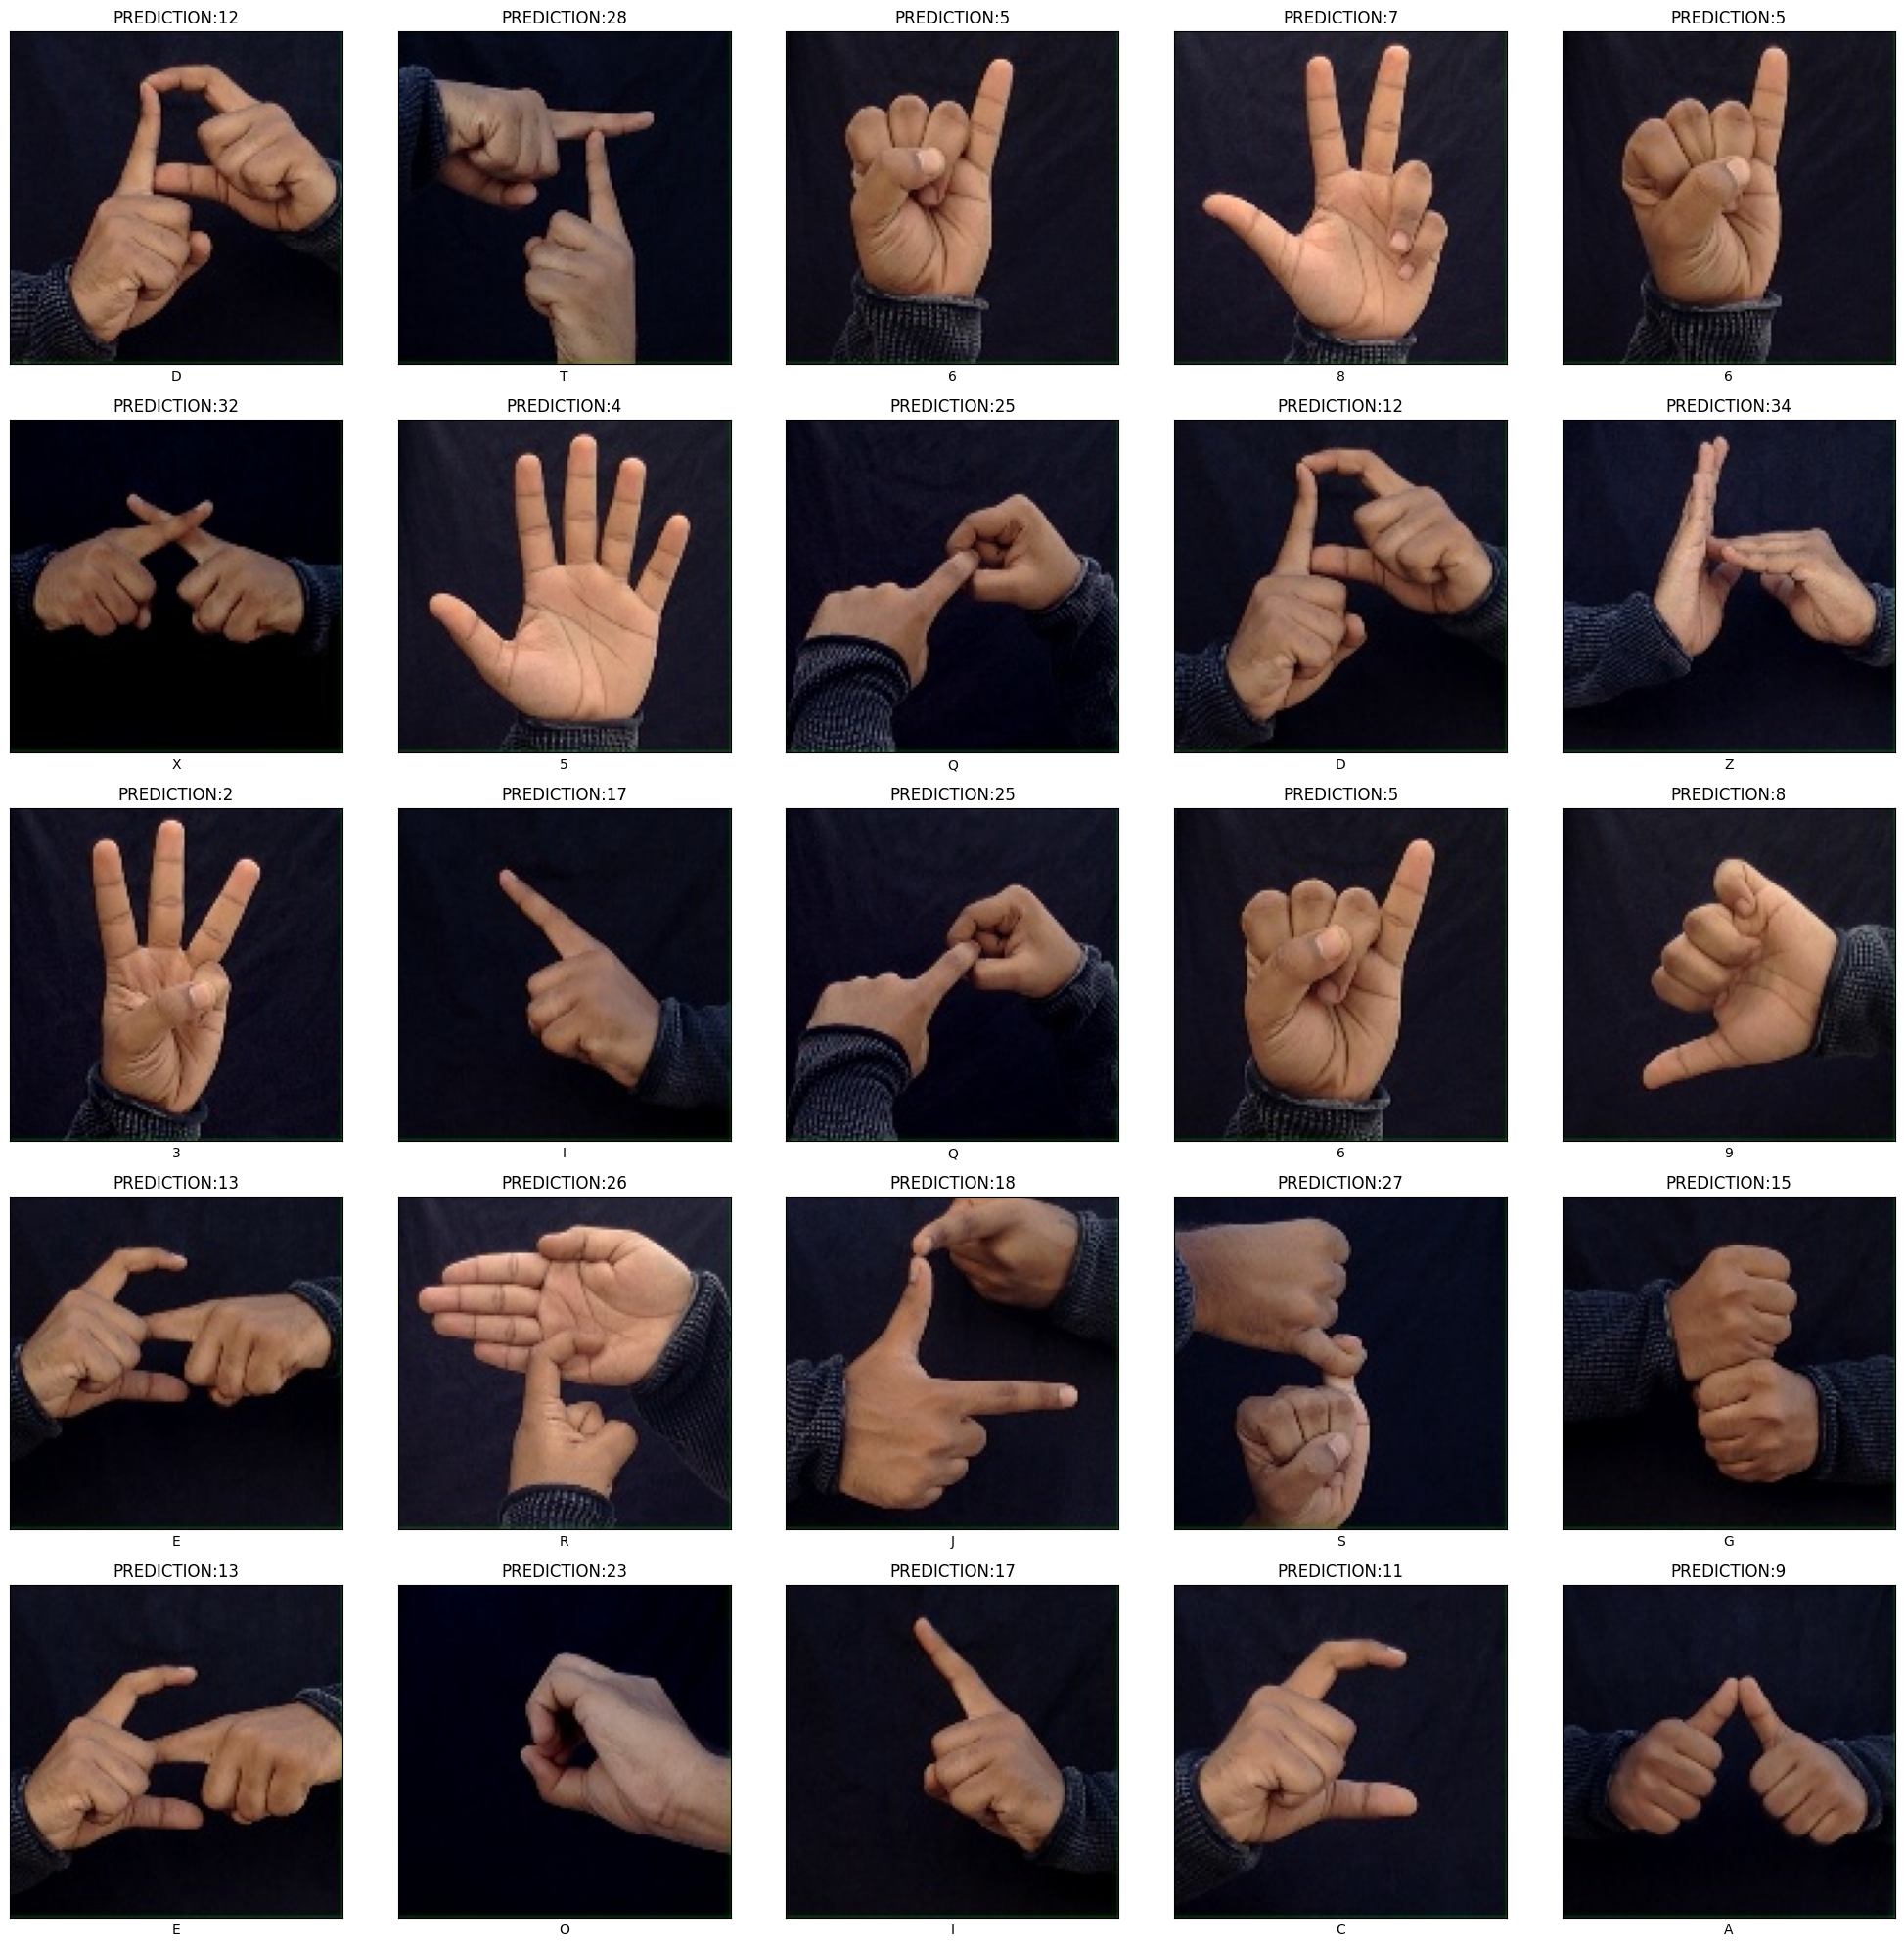

In [83]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(X_Test["JPG"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction[i]}")
    ax.set_xlabel(X_Test["CATEGORY"].iloc[i])
plt.tight_layout()
plt.show()